In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [2]:
hit = pd.read_csv("Hitters.csv")
df =hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
x_ = df.drop(["Salary","League","Division","NewLeague"], axis = 1).astype("float64")
x = pd.concat([x_,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)


In [3]:
gbm_model = GradientBoostingRegressor()
gbm_model.fit(x_train,y_train)

GradientBoostingRegressor()

# Tahmin

In [4]:
y_pred = gbm_model.predict(x_test)
np.sqrt(mean_squared_error(y_test,y_pred))

347.1449212687994

# Model Tuning

In [5]:
gbm_params = {"learning_rate": [0.001,0.01,0.1,0.2],
             "max_depth": [3,5,8,50,100],
             "n_estimators": [200,500,1000,2000],
             "subsample": [1,0.5,0.75]}

In [6]:
gbm = GradientBoostingRegressor()
gbm_cv_model = GridSearchCV(gbm,gbm_params,cv=10,n_jobs=-1,verbose=2)
gbm_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 8, 50, 100],
                         'n_estimators': [200, 500, 1000, 2000],
                         'subsample': [1, 0.5, 0.75]},
             verbose=2)

In [7]:
gbm_cv_model.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.5}

In [8]:
gbm_tuned = GradientBoostingRegressor(learning_rate=0.2,max_depth=3,subsample=0.5,n_estimators=200)
gbm_tuned.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.2, n_estimators=200, subsample=0.5)

In [9]:
y_pred = gbm_tuned.predict(x_test)

In [10]:
np.sqrt(mean_squared_error(y_test,y_pred))

344.58335810295034

In [11]:
Importance = pd.DataFrame({"Importance": gbm_tuned.feature_importances_*100},
                         index = x_train.columns)

Text(0.5, 0, 'Değişken Önem Düzeyleri')

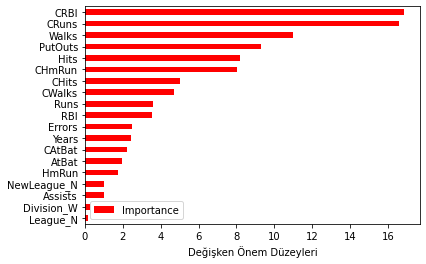

In [12]:
Importance.sort_values(by = "Importance", axis=0, ascending=True).plot(kind="barh",color ="r")

plt.xlabel("Değişken Önem Düzeyleri")